# From Machine Learning to Deep Learning

## Supervised Classification

Classification is taking an input and assigning a label to it. The supervised portion of it comes from having a training dataset of already labeled examples.

## Logistic Regression

$$ Wx + b = y $$

Scores ($y_i$) are also called _logits_.

## Softmax Function


Turns scores into proper probabilities. Proper probabilities sum to 1. They will be large when scores are large; small when scores are small.

$$ S(y_i) = \frac{e^{y_i}}{\sum\limits_{j}e^{y_j}} $$

### Quiz: Softmax


Behavior when scores are multiplied by 10: Probabilities get closer to 0 and 1 (more extreme since deviation of $e^{y_i}$ is much higher).

Behavior when scores are divided by 10: Probabilities get closer to uniform distribution ($\frac{1}{n}$) since deviations becomes much smaller and scores are more similar.

[ 0.8360188   0.11314284  0.05083836]


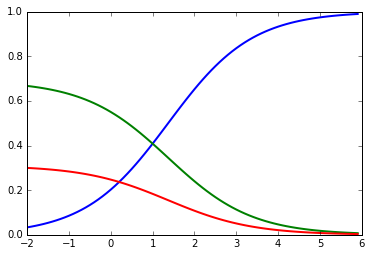

In [1]:
"""Softmax."""

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax(scores))

# Plot softmax curves
%matplotlib inline
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()

## One-Hot Encoding

Encode $n$ labels into a vector of $n$ length, where each vector contains one element that is equal to $1$, and the rest are $0$. The position of the 1 element encodes each label.

\\[
a \rightarrow \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix}
b \rightarrow \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix}
c \rightarrow \begin{pmatrix} 0\\0\\1\\0 \end{pmatrix}
d \rightarrow \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}
\\]

One down-side of one-hot encoding is that it will result in large vectors if the number of labels is large. This can be solved with _embeddings_.


## Cross Entropy

Cross entropy is a natural way to measure the distance between two probability vectors. $S(y)$ is the softmax function applied to the logits $y$. $L$ is the one-hot encoded labels.

$$ D(S, L) = -\sum\limits_{i} L_i \log(S_i) $$

For example:

\\[
S(y) = \begin{pmatrix} 0.7 \\\ 0.2 \\\ 0.1 \end{pmatrix}
L_i = \begin{pmatrix} 1 \\\ 0 \\\ 0 \end{pmatrix}
\\]

Cross-entropy is not symmetric: $D(S, L) \ne D(L, S)$.

## Loss and Minimizing Cross Entropy

Loss $\mathcal{L}$ in this definition is the average cross entropy distance over the entire training set.

$$ \mathcal{L}(W, b) = \frac{1}{N} \sum\limits_i D(S(Wx_i + b), L_i) $$

Loss is a function of the weights and the biases. We need to minimize loss; one way to do so is gradient descent.

### Gradient Descent

Use gradient descent to minimize loss. Find the derivative of the loss function $\mathcal{L}$ and apply a learning rate $\alpha$.

$$ -\alpha\Delta \mathcal{L}(W, b) $$

![Gradient Descent](gradient-descent.png)

## Recap: Multinomial Logistic Classification

Feed input $x$ into linear model $y(x)=Wx+b$ to produce logits.

With logits $y$, feed them into the softmax function $S(y_i) = \frac{e^{y_i}}{\sum\limits_{j}e^{y_j}}$ to produce probabilities.

With probabilities $S(y)$ and one-hot-encoded labels $L$, determine the cross entropy $D(S, L) = -\sum\limits_{i} L_i \log(S_i)$.

![Depiction of Multinomial Logistic Classification](multinomial-logistic-classification.png)

## Normalized Inputs and Initial Weights

### Normalizing Inputs

Due to floating point error, we want to maintain numerical stability. One way to do this is to using the following guiding principal. Each variable $x_i$ should have a mean of $0$ and equal variance $\sigma(x_i) = \sigma(x_j)$.

When variables are badly conditioned (unevenly scaled), then the optimizer has to do a lot of searching (more iterations/compute).

![Feature Scaling](scaling.png)

You can normalize an input by:

$$ \mbox{normalize}(x_i) = \frac{2(x_i - \mu_{x_i})}{x_{i,max} - x_{i,min}} $$

### Weight Initialization

Methodology: Draw weights randomly from a gaussian (normal) distribution with mean $0$ and standard deviation $\sigma$. Standard deviation $\sigma$ determines the order of magnitude of your outputs. The order of magnitude also determines the peakiness of the intial probability distribution.

A peaky initialized probability distribution (large $\sigma$) will result in an opinionated distribution. Whereas a probability distribution with small peaks will start out more uncertain. **Most likely, you want to choose a small $\sigma$ to start out uncertain and let the optimizer make it become more certain.**

## Measuring Performance

Classifiers will tend to memorize the data (**overfit**). To prevent this, test your classifier performance using a test set (small portion of the original dataset). However, this too has issues due to the trial and error approach of training a classifier. You may implicitly help your classifier learn your test set through your human decisions.

Simple solution: Carve out another dataset as your validation set that you only measure performance against after you've chosen your final model.

### Validation and Test Set Size

Statisticians cover your ears: a change that affects 30 examples in your validation set is usually statistically significant and can be trusted.

For most validation sets, people tend to hold back at least 30,000 examples since that mean accuracy changes $\gt 0.1\%$ should be statistically significant, giving you high enough resolution for your changes.

**NOTE**: This is only true for datasets with **balanced** classes. Consider cross-validation if you have unbalanced classes.

### Cross-Validation ($k$-fold)

Cross-validation involves splitting your dataset into $k$ folds. You can then evaluate your model $k$ times, using $k - 1$ folds as training data and the left over fold as the test set.

You can use different stratification strategies depending on how representative you want each fold to be.

Cross-validation is often slow, so getting more data is often the right solution.

![Cross-Validation](cross-validation.png)


#### Statistically Significant Cross-Validation

Number of folds $k$ has to be large enough (minimum 25-30) in order for the error rate $D_j = E_{1j} - E_{2j}$ between two classifiers $C1$ and $C2$ to be roughly normally distributed with mean $D_{TRUE}$.

Given the performance of two classifiers $C1$ and $C2$ using $k=25$ fold cross-validation, the variance $\sigma^2$ can be measured as:

$$ \sigma^2_{est} = \frac{\sum^{25}_{j=1}(D_j-D{av})^2}{24 \cdot 25} $$

The condifence interval for $D_{TRUE}$ is computed as:

$$ D_{TRUE} = D_{av} \pm \sigma^2_{est}t_{(1-\alpha)24} $$

where $t_{(1-\alpha)24}$ is the $t$ distribution coefficient found from a lookup table. $t_{(1-\alpha)}$ denotes the cumulative probability of $(1-\alpha)$, and 24 is the degrees of freedom ($k-1$).

## Stochastic Gradient Descent (SGD)

Instead of computing the loss over all the data, compute a very bad estimate of the loss based on a **tiny, random sample** of the data. Use this sampled loss to compute the gradient, which may at times even result in more loss. Compensate by doing many times, taking smaller steps at a time.

SGD scales well with both data and model size. It's fundamentally a bad optimizer; however, it's the only one that's fast enough in practice. As a result, there are many practical considerations one needs to take.

![Stochastic Gradient Descent](stochastic-gradient-descent.png)

### Helping SGD

#### Normalizing Inputs

Covered above. Recap: variables should have a mean of 0 and equal variance (small).

#### Initial Weights

Covered above. Recap: Should be random and normally distributed with a mean of 0 and equal variance (small).

#### Momentum

Each step taken in SGD occurs in a random direction. Rather than take each of those steps, utilize accumulated knowledge. Keep a running average $M$ of the gradient.

$$ M \leftarrow 0.9M + \Delta\mathcal{L} $$

Use the running average instead of the direction of the current batch of the data:

$$ -\alpha \Delta M(W,b) $$

This momentum technique usually works pretty well and leads to better convergence.

#### Learning Rate Decay

Make the step smaller and smaller as your train by controlling the learning rate $\alpha$. Some use an exponential decay. Some decrease the learning rate everytime there's a plateau.

## Hyperparameter Tuning

### Learning Rate Tuning

Having a higher learning rate will not necessarily mean you will get to a better model faster. In fact the opposite may be true: a lower learning rate may get you to a better model faster.

Never confuse how quickly you learn with how well you train.

![Learning Rate Tuning](learning-rate-tuning.png)

### SGD "Black Magic"

Many hyper-parameters:

- Initial learning rate
- Learning rate decay
- Momentum
- Batch size
- Weight initialization

In practice, when things don't work, **try lowering your learning rate first**.

### Adagrad

Learning is less sensitive to hyper-parameters:

- <strike>Initial learning rate</strike>
- <strike>Learning rate decay</strike>
- <strike>Momentum</strike>
- Batch size
- Weight initialization

However, it often tends to be a little worse than *precisely-tuned* SGD with momentum.